In [13]:
#kütüphaneler
import pandas as pd 
import numpy as np
import seaborn as sbn

In [14]:
#veriyi yükle
data = pd.read_csv("housing.csv")

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
#kolon isimlerini inceleme
data.columns = ["boylam","enlem","ortalama_ev_yaşı","toplam_oda","toplam_yatak_odası","nüfus","hane_sayısı","ortalama_gelir","ev_fiyatı","okyanusa_yakınlık"]

In [17]:
#verinin ilk 5 satırı
data.head()

,boylam,enlem,ortalama_ev_yaşı,toplam_oda,toplam_yatak_odası,nüfus,hane_sayısı,ortalama_gelir,ev_fiyatı,okyanusa_yakınlık
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
#nan değer kontrolü
data.isna().sum()

boylam                  0
enlem                   0
ortalama_ev_yaşı        0
toplam_oda              0
toplam_yatak_odası    207
nüfus                   0
hane_sayısı             0
ortalama_gelir          0
ev_fiyatı               0
okyanusa_yakınlık       0
dtype: int64

In [25]:
#verinin miktarı
data.shape

(20640, 10)

In [27]:
# na verinin ortalama ile dolduurlması
data["toplam_yatak_odası"].fillna((data["toplam_yatak_odası"].mean()),inplace=True)

In [28]:
#tekrar na kontrol
data.isna().sum()

boylam                0
enlem                 0
ortalama_ev_yaşı      0
toplam_oda            0
toplam_yatak_odası    0
nüfus                 0
hane_sayısı           0
ortalama_gelir        0
ev_fiyatı             0
okyanusa_yakınlık     0
dtype: int64

In [29]:
#tekrar veri büyüklüğü kontrol
data.shape

(20640, 10)

In [30]:
#label encoder yüklenmesi
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["okyanusa_yakınlık"] = le.fit_transform(data["okyanusa_yakınlık"])


In [31]:
#encoderdan sonra ilk 5 satır kontrol
data.head()

,boylam,enlem,ortalama_ev_yaşı,toplam_oda,toplam_yatak_odası,nüfus,hane_sayısı,ortalama_gelir,ev_fiyatı,okyanusa_yakınlık
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


<AxesSubplot:>

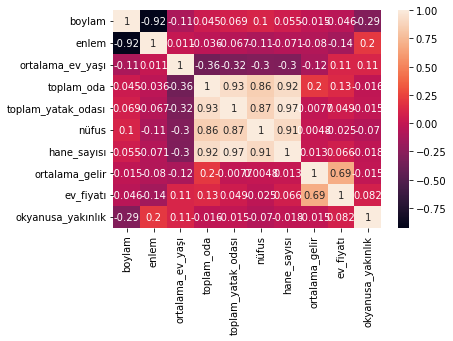

In [34]:
#heat map
cor = data.corr()
sbn.heatmap(cor,annot = True)

In [44]:
#verileri x y diye ayır ve kontrol et
x = data.drop(["ev_fiyatı"],axis = 1)
y= data.iloc[:,-2]

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: ev_fiyatı, dtype: float64

In [46]:
#veriyi describe et
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   boylam              20640 non-null  float64
 1   enlem               20640 non-null  float64
 2   ortalama_ev_yaşı    20640 non-null  float64
 3   toplam_oda          20640 non-null  float64
 4   toplam_yatak_odası  20640 non-null  float64
 5   nüfus               20640 non-null  float64
 6   hane_sayısı         20640 non-null  float64
 7   ortalama_gelir      20640 non-null  float64
 8   ev_fiyatı           20640 non-null  float64
 9   okyanusa_yakınlık   20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [50]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [52]:
#train shape test
y_train.shape

(14448,)

In [53]:
# test shape test
x_test.shape

(6192, 9)

In [64]:
#fit ve Transform et
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train

array([[-1.37693875,  1.07845537,  0.42384877, ..., -0.15428544,
        -0.80625541,  1.29574442],
       [-1.4369399 ,  1.00333389,  1.84651018, ...,  0.01855668,
        -0.26723027,  1.29574442],
       [ 0.54809812, -0.6587288 ,  0.50288551, ..., -0.53139554,
         0.46724695, -0.81778233],
       ...,
       [ 1.14310952, -0.73854537, -1.71014335, ..., -0.20142421,
         0.33428671, -0.11327341],
       [-0.95693071,  1.82497505, -0.28748194, ..., -0.903268  ,
         0.01533005, -0.11327341],
       [ 0.65810023, -0.75732574,  1.37228971, ..., -0.44235566,
        -0.952686  , -0.81778233]])

In [65]:
#modeli eğit linear regrasyon ile
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
#tahmin al r2 skor u bas
prediction=lr.predict(x_test)
print(r2_score(prediction,y_test))

0.4164757832546826


In [68]:
#random forest ile eğit 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
# random forest ile tahmin al ve doğruluğunu bas
prediction_rfr=rfr.predict(x_test)
print(r2_score(prediction_rfr,y_test))

0.7142039049562348
